### IMPORTING DATASET -KDDCUP99

In [109]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

In [110]:
import pandas as pd
from tensorflow.keras.utils import get_file

pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 5)

try:
    path = get_file('kdd-with-columns.csv', origin=\
    'https://github.com/jeffheaton/jheaton-ds2/raw/main/'\
    'kdd-with-columns.csv',archive_format=None)
except:
    print('Error downloading')
    raise
    
print(path) 

# Origional file: http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
df = pd.read_csv(path)

print("Read {} rows.".format(len(df)))
# df = df.sample(frac=0.1, replace=False) # Uncomment this line to 
# sample only 10% of the dataset
df.dropna(inplace=True,axis=1) 
# For now, just drop NA's (rows with missing values)


# display 5 rows
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 5)
df

/home/rahul/.keras/datasets/kdd-with-columns.csv
Read 494021 rows.


,duration,protocol_type,...,dst_host_srv_rerror_rate,outcome
0,0,tcp,...,0.0,normal.
1,0,tcp,...,0.0,normal.
...,...,...,...,...,...
494019,0,tcp,...,0.0,normal.
494020,0,tcp,...,0.0,normal.


### ANALYSE DATASET

In [111]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,\
                int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])
# Analyze KDD-99
analyze(df)


494021 rows
** duration:2495 (0%)
** protocol_type:[icmp:57.41%,tcp:38.47%,udp:4.12%]
** service:[ecr_i:56.96%,private:22.45%,http:13.01%,smtp:1.97%,other:1.46%,domain_u:1.19%,ftp_data:0.96%,eco_i:0.33%,ftp:0.16%,finger:0.14%,urp_i:0.11%,telnet:0.1%,ntp_u:0.08%,auth:0.07%,pop_3:0.04%,time:0.03%,csnet_ns:0.03%,remote_job:0.02%,gopher:0.02%,imap4:0.02%,discard:0.02%,domain:0.02%,systat:0.02%,iso_tsap:0.02%,echo:0.02%,shell:0.02%,rje:0.02%,sql_net:0.02%,whois:0.02%,printer:0.02%,courier:0.02%,nntp:0.02%,netbios_ssn:0.02%,sunrpc:0.02%,mtp:0.02%,vmnet:0.02%,uucp:0.02%,klogin:0.02%,uucp_path:0.02%,bgp:0.02%,supdup:0.02%,ssh:0.02%,nnsp:0.02%,hostnames:0.02%,login:0.02%,daytime:0.02%,efs:0.02%,link:0.02%,netbios_ns:0.02%,ldap:0.02%,pop_2:0.02%,netbios_dgm:0.02%,http_443:0.02%,exec:0.02%,kshell:0.02%,name:0.02%,ctf:0.02%,netstat:0.02%,Z39_50:0.02%,IRC:0.01%,urh_i:0.0%,X11:0.0%,tim_i:0.0%,pm_dump:0.0%,red_i:0.0%,tftp_u:0.0%]
** flag:[SF:76.6%,S0:17.61%,REJ:5.44%,RSTR:0.18%,RSTO:0.12%,SH:0.02%,S

In [112]:
object_columns = df.select_dtypes(include=['object']).columns

In [113]:
object_columns

Index(['protocol_type', 'service', 'flag', 'outcome'], dtype='object')

In [114]:
df.shape

(494021, 42)

In [115]:
df['duration'].value_counts()

0        481671
1          2476
          ...  
20116         1
5502          1
Name: duration, Length: 2495, dtype: int64

In [116]:
test =df.iloc[:,0:42]
test

,duration,protocol_type,...,dst_host_srv_rerror_rate,outcome
0,0,tcp,...,0.0,normal.
1,0,tcp,...,0.0,normal.
...,...,...,...,...,...
494019,0,tcp,...,0.0,normal.
494020,0,tcp,...,0.0,normal.


In [117]:
# # Encode a numeric column as zscores
# def encode_numeric_zscore(df, name, mean=None, sd=None):
#     if mean is None:
#         mean = df[name].mean()

#     if sd is None:
#         sd = df[name].std()

#     df[name] = (df[name] - mean) / sd
    
# # Encode text values to dummy variables(i.e. [1,0,0],
# # [0,1,0],[0,0,1] for red,green,blue)
# def encode_text_dummy(df, name):
#     dummies = pd.get_dummies(df[name])
#     for x in dummies.columns:
#         dummy_name = f"{name}-{x}"
#         df[dummy_name] = dummies[x]
#     df.drop(name, axis=1, inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
duration                       494021 non-null int64
protocol_type                  494021 non-null object
service                        494021 non-null object
flag                           494021 non-null object
src_bytes                      494021 non-null int64
dst_bytes                      494021 non-null int64
land                           494021 non-null int64
wrong_fragment                 494021 non-null int64
urgent                         494021 non-null int64
hot                            494021 non-null int64
num_failed_logins              494021 non-null int64
logged_in                      494021 non-null int64
num_compromised                494021 non-null int64
root_shell                     494021 non-null int64
su_attempted                   494021 non-null int64
num_root                       494021 non-null int64
num_file_creations             494021 

REMOVAL OF DUPLICATES





In [119]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [120]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.service=le.fit_transform(df.service)
df['service']

0         22
1         22
          ..
494019    22
494020    22
Name: service, Length: 145586, dtype: int64

In [121]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.protocol_type=le.fit_transform(df.protocol_type)
df

,duration,protocol_type,...,dst_host_srv_rerror_rate,outcome
0,0,1,...,0.0,normal.
1,0,1,...,0.0,normal.
...,...,...,...,...,...
494019,0,1,...,0.0,normal.
494020,0,1,...,0.0,normal.


In [122]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.flag=le.fit_transform(df.flag)
df

,duration,protocol_type,...,dst_host_srv_rerror_rate,outcome
0,0,1,...,0.0,normal.
1,0,1,...,0.0,normal.
...,...,...,...,...,...
494019,0,1,...,0.0,normal.
494020,0,1,...,0.0,normal.


In [123]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.outcome=le.fit_transform(df.outcome)
df

,duration,protocol_type,...,dst_host_srv_rerror_rate,outcome
0,0,1,...,0.0,11
1,0,1,...,0.0,11
...,...,...,...,...,...
494019,0,1,...,0.0,11
494020,0,1,...,0.0,11


In [124]:
df['outcome']

0         11
1         11
          ..
494019    11
494020    11
Name: outcome, Length: 145586, dtype: int64

In [125]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ohe=ColumnTransformer([('OHE',OneHotEncoder(),['protocol_type'])],remainder='passthrough')
x=ohe.fit_transform(df.drop('outcome',axis='columns'))
x=x[:,1:]#dropping the first column to avoid dummy variable trap
x

/home/rahul/anaconda3/envs/ml-ids-notebooks/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [1.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ]])

In [126]:
y =df.iloc[:,-1]

In [127]:
y

0         11
1         11
          ..
494019    11
494020    11
Name: outcome, Length: 145586, dtype: int64

In [128]:
x.shape

(145586, 42)

In [129]:
y.shape

(145586,)

In [130]:
df.shape

(145586, 42)

## Log-scaled distribution of attacks

<Figure size 432x288 with 0 Axes>

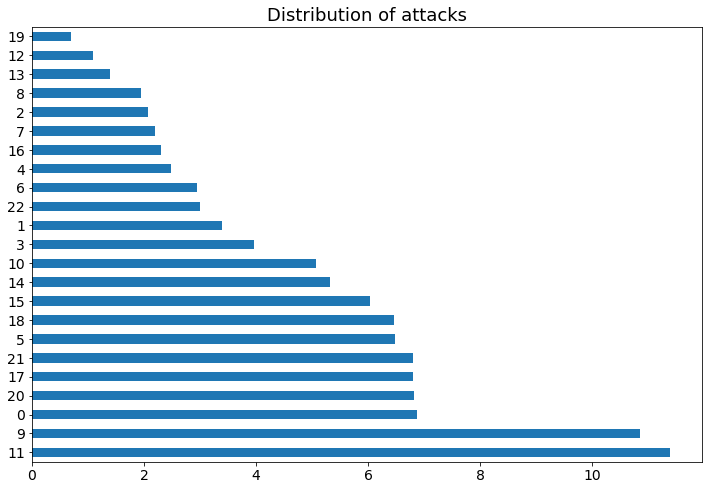

In [131]:
import matplotlib.pyplot as plt
import matplotlib
plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')
#df.plot(kind='barh')
df['outcome'].value_counts().apply(np.log).plot(kind='barh')

plt.show()

In [132]:
df.iloc[:,41]

0         11
1         11
          ..
494019    11
494020    11
Name: outcome, Length: 145586, dtype: int64

In [133]:
y=df.iloc[:,-1]

In [134]:
y

0         11
1         11
          ..
494019    11
494020    11
Name: outcome, Length: 145586, dtype: int64

In [135]:
from keras.utils.np_utils import to_categorical
y = np.array(y)
y


array([11, 11, 11, ..., 11, 11, 11])

In [136]:
y=to_categorical(y)

In [137]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [138]:
y.shape

(145586, 23)

In [139]:
yt1 =y[:90000]
yt2=y[90000:]

In [140]:
yt1.shape

(90000, 23)

In [141]:
yt2.shape

(55586, 23)

### SPLIT DATASET TO TRAIN AND TEST

In [142]:
traindata= df.iloc[:90000,:]
testdata= df.iloc[90000:,:]

In [143]:
traindata.shape

(90000, 42)

In [144]:
testdata.shape

(55586, 42)

In [145]:
X = traindata.iloc[:,0:40]
Y = traindata.iloc[:,41]
C = testdata.iloc[:,41]
T = testdata.iloc[:,0:40]


In [146]:
# Y.shape

In [147]:
C.shape


(55586,)

In [148]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

In [149]:
scaler = Normalizer().fit(T)
testT = scaler.transform(T)

In [150]:
from keras.utils.np_utils import to_categorical
y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)


In [151]:
y_test.shape

(55586, 21)

In [152]:
y_train.shape

(90000, 23)

In [153]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))

In [154]:
X_train.shape

(90000, 40, 1)

In [155]:
X_test.shape

(55586, 40, 1)

In [156]:
y_train.shape

(90000, 23)

In [157]:
X_test.shape

(55586, 40, 1)

In [158]:
y_test.shape

(55586, 21)

In [159]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [160]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [161]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [162]:

lstm_output_size = 70

cnn = Sequential()
cnn.add(Convolution1D(64, 3,activation="relu",input_shape=(40, 1)))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(LSTM(lstm_output_size))
cnn.add(Dropout(0.1))
cnn.add(Dense(23, activation="softmax"))

# define optimizer and objective, compile cnn

cnn.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

# train
checkpointer = callbacks.ModelCheckpoint(filepath="checkpoint/cnnlstm/checkpoint-{epoch:02d}.hdf5", verbose=1,save_best_only=True, monitor='accuracy',mode='max')
csv_logger = CSVLogger('logs/cnnlstm.csv',separator=',', append=False)
cnn.fit(X_train, yt1, epochs=50, validation_data=(X_test, yt2),callbacks=[checkpointer,csv_logger])
cnn.save("results/cnnlstm/cnnlstm_model.hdf5")

Train on 90000 samples, validate on 55586 samples
Epoch 1/50
90000/90000 [==============================] - 125s 1ms/step - loss: 0.2895 - accuracy: 0.9347 - val_loss: 0.1507 - val_accuracy: 0.9631

Epoch 00001: accuracy improved from -inf to 0.93471, saving model to checkpoint/cnnlstm/checkpoint-01.hdf5
Epoch 2/50
90000/90000 [==============================] - 110s 1ms/step - loss: 0.1234 - accuracy: 0.9677 - val_loss: 0.1242 - val_accuracy: 0.9655

Epoch 00002: accuracy improved from 0.93471 to 0.96773, saving model to checkpoint/cnnlstm/checkpoint-02.hdf5
Epoch 3/50
90000/90000 [==============================] - 108s 1ms/step - loss: 0.0861 - accuracy: 0.9775 - val_loss: 0.1012 - val_accuracy: 0.9698

Epoch 00003: accuracy improved from 0.96773 to 0.97753, saving model to checkpoint/cnnlstm/checkpoint-03.hdf5
Epoch 4/50
90000/90000 [==============================] - 129s 1ms/step - loss: 0.0691 - accuracy: 0.9823 - val_loss: 0.0923 - val_accuracy: 0.9783

Epoch 00004: accuracy impro